# Text reading

This notebook will contain all reading scripts to analyse the conpes documents.

In [1]:
# General packages for text reading
import requests
import re
import pandas as pd
import os
import urllib
import PyPDF2
import time
import sys

# Packages for text preprocessing
import re
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer#, TfidfVectorizer
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
#-----------------------
# Load every pdf in list
#-----------------------

scriptPath = sys.path[0]


# Absolute working directory
# Necessary for relative call inside the next loops
os.chdir(scriptPath + '/Last_conpes_pdfs')

# Pdfs directory
scriptPath = sys.path[0]
files = os.listdir(scriptPath + '/Last_conpes_pdfs')

# Natural sort
#files = sorted(files, key=lambda x: int(x.split('.')[0]))

# Empty list to fill with every pdf
Database = []

# For each FILE in files
for FILE in files:
    # If ends with .pdf, read it in binary format and append it to the list 
    if FILE.endswith('.pdf'):
        data = open(FILE,'rb') 
        Database.append(data)

# Fisrt 10 files
Database[0:10]

[<_io.BufferedReader name='3873.pdf'>,
 <_io.BufferedReader name='3874.pdf'>,
 <_io.BufferedReader name='3875.pdf'>,
 <_io.BufferedReader name='3876.pdf'>,
 <_io.BufferedReader name='3877.pdf'>,
 <_io.BufferedReader name='3878.pdf'>,
 <_io.BufferedReader name='3879.pdf'>,
 <_io.BufferedReader name='3880.pdf'>,
 <_io.BufferedReader name='3881.pdf'>,
 <_io.BufferedReader name='3882.pdf'>]

With the pdfs in memory, now it's time to store the text as strings in a table

In [3]:
# data frame with contents of all pdfs
text_table = pd.DataFrame(index = [0], columns = ['PDF','Text'])

fileIndex = 0

# Execution time of loop
t0 = time.time()

# For every pdf that can be read
for file in files:
  # Binary
  pdfFileObj = open(file,'rb')
  # PyPDF2 magick
  pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  # Start page count
  startPage = 0
  # To be filled with text
  text = ''
  cleanText = ''
  # While counter is less than number of pages
  while startPage <= pdfReader.numPages-1:
    pageObj = pdfReader.getPage(startPage)
    text += pageObj.extractText()
    startPage += 1
  pdfFileObj.close()
  # For every word inside the text
  for myWord in text:
    # Ignore line skips
    if myWord != '\n':
      cleanText += myWord
  # Almost clean text
  text = cleanText
  # Row for every pdf in the data frame
  newRow = pd.DataFrame(index = [0], columns = ['PDF', 'Text'])
  # Insert each value of the columns per row
  newRow.iloc[0]['PDF'] = file
  newRow.iloc[0]['Text'] = text
  # Concatenate each generated row to the empty (no so empty after 1 iteration) data frame
  text_table = pd.concat([text_table, newRow], ignore_index=True)        


t1 = time.time()

# 20 minutes to process all pdfs more or less
total = t1-t0

In [4]:
# Lenghty
total

159.44346499443054

In [4]:
text_table = text_table.iloc[1:]
text_table

,PDF,Text
1,3873.pdf,Documento CONPES CONSEJO NACIO...
2,3874.pdf,Documento CONPES CONSEJO NACION...
3,3875.pdf,Documento CONPES CONSEJO NACIO...
4,3876.pdf,Documento CONPES CONSEJO NACI...
5,3877.pdf,Documento CONPES CONSEJO NACIO...
6,3878.pdf,Documento CONPES CONSEJO NACI...
7,3879.pdf,Documento CONPES CONSEJO NACION...
8,3880.pdf,Documento CONPES CONSEJO NACION...
9,3881.pdf,Documento CONPES CONSEJO NA...
10,3882.pdf,Documento CONPES CONSEJO NACION...


In [134]:
text_table.Text[1]

'    Documento  CONPES            CONSEJO NACIONAL DE POLÍTICA ECONÓMICA Y SOCIAL  REPÚBLICA DE COLOMBIA DEPARTAMENTO NACIONAL DE PLANEACIÓN       CONCEPTO FAVORABLE A LA NACIÓN PARA OTORGAR GARANTÍA A GECELCA S.A. E.S.P. PARA CONTRATAR OPERACIONES DE CRÉDITO PÚBLICO INTERNO CON LA BANCA COMERCIAL HASTA POR LA SUMA DE 250.000 MILLONES DE PESOS, DESTINADOS A FINANCIAR EL CUMPLIMIENTO DE OBLIGACIONES CON PROVEEDORES Y LA FINANCIACIÓN DE LA ETAPA FINAL DEL PROYECTO GECELCA 3.2     Departamento Nacional de Planeación Ministerio de Minas y Energía Ministerio de Hacienda y Crédito Público   Versión aprobada      Bogotá, D.C., 12 de noviembre de 2016   3873     2     CONSEJO NACIONAL DE POLÍTICA ECONÓMICA Y SOCIAL CONPES   Juan Manuel Santos Calderón Presidente de la República  Germán Vargas Lleras Vicepresidente de la República   Juan Fernando Cristo Bustos Ministro del Interior María Ángela Holguín Cuéllar Ministra de Relaciones Exteriores  Mauricio Cárdenas Santamaría Ministro de Hacienda 

# Preprocessing

Useful functions to clean text.

In [5]:
# Remove non-ASCII characters
def remove_noChar(words):
    return [re.sub(u"[^a-zA-ZñÑáéíóúÁÉÍÓÚ ]","", word) for word in words]

# Remove stopwords
def remove_sw(words,sw_list):
    return [word for word in words if word not in sw_list]

# Remove short characters
def remove_shortW(words):
    return [word for word in words if len(word) > 2]

# Remove accents
# This most likely will not be necessary for this project
def remove_tilde(words):
    return [r_tilde(word) for word in words]

# Replace function of accents
def r_tilde(word):
    w=[]
    for letra in list(word):
        if letra == 'á': letra = 'a'
        if letra == 'é': letra = 'e'
        if letra == 'í': letra = 'i'
        if letra == 'ó': letra = 'o'
        if letra == 'ú': letra = 'u'
        w += letra
    return ''.join(w)

# Function that uses previous functions
def preProc_docs(documentos):
    documentos = [re.sub(r'[^\w\s]',' ',proy) for proy in documentos]
    documentos = [[word for word in texto.lower().split()] for texto in documentos]
    documentos = [remove_noChar(text) for text in documentos]
    #documentos = [remove_tilde(text) for text in documentos]
    documentos = [remove_sw(words_lst, all_stopwords) for words_lst in documentos]
    documentos = [remove_shortW(text) for text in documentos]
    return [' '.join(item) for item in documentos]

## Stop words managament

This function replaces the stopwords present in the text.

In [6]:
# archivo stopwords
with open(scriptPath + '/stop_words_spanish.txt', 'rb') as f:
    sw_spanish = f.read().decode('latin-1').replace(u'\r', u'').split(u'\n')

sw_spanish

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'es',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'fue',
 'este',
 'ha',
 'sí',
 'porque',
 'esta',
 'son',
 'entre',
 'está',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'ser',
 'tiene',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'han',
 'quien',
 'están',
 'estado',
 'desde',
 'todo',
 'nos',
 'durante',
 'estados',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'fueron',
 'ese',
 'eso',
 'había',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'sea',
 'poco',
 'ella',
 'estar',
 'haber',
 'estas',
 'estaba',
 'estamos',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 '

## Download stopwords from nltk

We use nltk stopwords list and combine it with our stopwords.

In [9]:
# Run this line only once
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
# Stop words set de nltk
default_stopwords = nltk.corpus.stopwords.words('spanish')

# Combine both set of stop words
all_stopwords = list(set(default_stopwords) | set(sw_spanish) )

all_stopwords

['están',
 'próximos',
 'el',
 'tuviste',
 'trata',
 'mío',
 'será',
 'lado',
 'estaremos',
 'estará',
 'con',
 'han',
 'fue',
 'sin',
 'éramos',
 'propia',
 'últimas',
 'buena',
 'estos',
 'ahí',
 'quiza',
 'serán',
 'van',
 'hubieron',
 'hago',
 'que',
 'antano',
 'sigue',
 'hubiste',
 'dónde',
 'habías',
 'dos',
 'embargo',
 'intentan',
 'estaréis',
 'hizo',
 'pueden',
 'podrian',
 'solo',
 'estuvieseis',
 'deben',
 'proximo',
 'estar',
 'fui',
 'tuviese',
 'porque',
 'luego',
 'estaríamos',
 'estadas',
 'se',
 'estábamos',
 'primer',
 'vosotras',
 'deprisa',
 'seamos',
 'siguiente',
 'o',
 'menos',
 'quienes',
 'mia',
 'ellas',
 'mis',
 'cuántas',
 'días',
 'fueras',
 'vuestro',
 'tuvieras',
 'cuales',
 'dicen',
 'consigue',
 'aseguró',
 'habrían',
 'ejemplo',
 'podría',
 'nuestro',
 'usas',
 'solos',
 'tendríamos',
 'pasada',
 'excepto',
 'realizar',
 'cuánta',
 'sabe',
 'mio',
 'eso',
 'tengáis',
 'ti',
 'habido',
 'otro',
 'ahora',
 'fuiste',
 'fuimos',
 'poco',
 'd',
 'aqui',
 

## Text cleaning

The functions are applied to the text column.

In [8]:
# Table data 

t0 = time.time()

clean_text = pd.DataFrame(text_table.Text)

clean_text = clean_text.apply(preProc_docs)

t1 = time.time()

# 20 minutes to process all pdfs more or less
total = t1-t0

In [11]:
total

15.24420714378357

In [255]:
print(clean_text.Text.iloc[26])

documento conpes consejo nacional política económica social república colombia departamento nacional planeación actualización documento conpes apoyo gobierno nacional política movilidad región capital bogotá cundinamarca declaratoria importancia estratégica proyecto sistema integrado transporte masivo soacha fases iii departamento nacional planeación ministerio hacienda crédito público ministerio transporte versión aprobada bogotá septiembre consejo nacional política económica social conpes juan manuel santos calderón presidente república óscar adolfo naranjo trujillo vicepresidente república guillermo abel rivera flórez ministro interior maría ángela holguín cuéllar ministra relaciones exteriores mauricio cárdenas santamaría ministro hacienda crédito público enrique jesús gil botero ministro justicia derecho luis carlos villegas echeverri ministro defensa nacional aurelio iragorri valencia ministro agricultura desarrollo rural alejandro gaviria uribe ministro salud protección social g

## Extract titles

In [9]:
import re
#re.search(r'DEPARTAMENTO NACIONAL DE PLANEACIÓN\.(.*?)Departamento Nacional de Planeación', text_table.Text[5])

titles = []
for i in range(1,len(clean_text)):
    try:
        
        temp = re.search('nacional planeación(.*)versión aprobada', clean_text.Text.iloc[i])
        temp2 = temp.group(1).strip()
        temp3 = temp2.replace('CONSEJO NACIONAL DE POLÍTICA ECONÓMICA Y SOCIAL  REPÚBLICA DE COLOMBIA DEPARTAMENTO NACIONAL DE PLANEACIÓN       ','')
        titles.append(temp2)
        
    except:
        pass
    
    #except Exception:
    #    temp = re.search('Documento  CONPES(.*)Versión aprobada', text_table.Text[i])
    
    #if not os.path.isfile(filename):
    #    try: 
    #        urllib.request.urlretrieve(url, filename)
            
    #    except Exception:
    #        pass

len(titles)
titles


    

['política nacional gestión integral residuos sólidos departamento nacional planeación ministerio ambiente desarrollo sostenible ministerio vivienda ciudad territorio ministerio educación nacional ministerio minas energía comisión regulación agua potable saneamiento básico departamento administrativo nacional estadísticas superintendencia servicios públicos domiciliarios unidad planeación minero energética',
 'concepto favorable nación otorgar garantía fondo empresarial creado ley contratar operaciones pasivas crédito interno suma millones pesos departamento nacional planeación ministerio hacienda crédito público superintendencia servicios públicos domiciliarios',
 'concepto favorable nación contratar empréstitos externos libre destinación rápido desembolso líneas crédito contingentes ocurrencia desastres naturales entidades financieras internacionales organismos multilaterales entidades fomento gobiernos suma usd millones equivalente monedas financiar apropiaciones presupuestales prio

# Term document matrix with TF-IDF

With the text now cleaned, we need to construct the term document matrix with TF-IDF. This method is prefered for clustering, since it gives relative importance to the words, normalizing the data.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

#corpus = ["welcome to stackoverflow my friend", 
#          "my friend, don't worry, you can get help from stackoverflow"]

#corpus = clean_text.Text.copy()
corpus = titles.copy()

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(corpus)

#print(matrix)

a = matrix.todense()
print(a)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [269]:
# Attempt number two
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy
 
# Sample data for analysis
#data1 = "Java is a language for programming that develops a software for several platforms. A compiled code or bytecode on Java application can run on most of the operating systems including Linux, Mac operating system, and Linux. Most of the syntax of Java is derived from the C++ and C languages."
#data2 = "Python supports multiple programming paradigms and comes up with a large standard library, paradigms included are object-oriented, imperative, functional and procedural."
#data3 = "Go is typed statically compiled language. It was created by Robert Griesemer, Ken Thompson, and Rob Pike in 2009. This language offers garbage collection, concurrency of CSP-style, memory safety, and structural typing."
 
#df1 = pd.DataFrame({'Java': [data1], 'Python': [data2], 'Go': [data2]})
 
# Initialize
vectorizer = TfidfVectorizer()

clean_text2 = numpy.transpose(clean_text)

doc_vec = vectorizer.fit_transform(clean_text2.iloc[0])
 
# Create dataFrame
df2 = pd.DataFrame(doc_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names())
 
# Change column headers
df2.columns = clean_text2.columns
print(df2)




                      1         2         3         4         5         6   \
aaa             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aaai            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aacaaf          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aafp            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aalto           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abad            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abajo           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abandonadas     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abandonados     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abandonan       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abandonar       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
abandone        0.000000  0.000000  0.000000  0.000000  0.000000

In [32]:
##############################################
# Attempt 3



In [33]:
# COSINE WITH THIS
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[0:1], tfidf).flatten()

In [34]:
cosine_similarities

array([1.])

In [15]:
# rename column names
df2.columns = text_table.PDF

In [16]:
df2

PDF,3873.pdf,3874.pdf,3875.pdf,3876.pdf,3877.pdf,3878.pdf,3879.pdf,3880.pdf,3881.pdf,3882.pdf,...,3957.pdf,3958.pdf,3959.pdf,3960.pdf,3961.pdf,3963.pdf,3966.pdf,3968.pdf,3969.pdf,3970.pdf
aaa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018224,0.000000
aaai,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aacaaf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aafp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aalto,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001888,0.000000,0.011110,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abajo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001703,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abandonadas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abandonados,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abandonan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005543,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007127


## Cosine similarity

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(a)
dist_mat = np.asmatrix(dist)
dist_mat

#dist_mat = pd.DataFrame(dist)
#dist_mat.shape

#dist_mat.columns = text_table.PDF







matrix([[ 1.11022302e-16,  8.00977384e-01,  9.59666647e-01, ...,
          9.25632844e-01,  8.66746315e-01,  9.11258866e-01],
        [ 8.00977384e-01,  0.00000000e+00,  8.39186828e-01, ...,
          9.54003786e-01,  7.35527239e-01,  8.30580210e-01],
        [ 9.59666647e-01,  8.39186828e-01, -2.22044605e-16, ...,
          9.62051605e-01,  8.56300309e-01,  7.87665019e-01],
        ...,
        [ 9.25632844e-01,  9.54003786e-01,  9.62051605e-01, ...,
         -4.44089210e-16,  9.30634906e-01,  9.48143798e-01],
        [ 8.66746315e-01,  7.35527239e-01,  8.56300309e-01, ...,
          9.30634906e-01,  0.00000000e+00,  7.64529220e-01],
        [ 9.11258866e-01,  8.30580210e-01,  7.87665019e-01, ...,
          9.48143798e-01,  7.64529220e-01, -4.44089210e-16]])

In [18]:
# Attempt number 4 for cosine similarity
import sklearn.preprocessing as pp

def cosine_similarities(mat):
    col_normed_mat = pp.normalize(mat.tocsc(), axis=0)
    return col_normed_mat.T * col_normed_mat

mat = cosine_similarities(df2)

AttributeError: 'DataFrame' object has no attribute 'tocsc'

## Dimensionality reduction

<function matplotlib.pyplot.show(*args, **kw)>

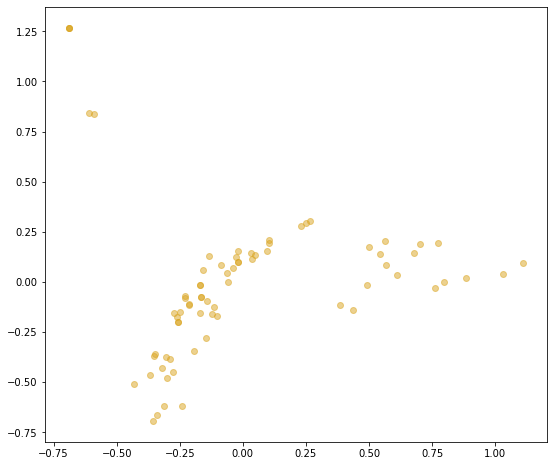

In [12]:
# Attempt
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
pca_data = pca.fit_transform(dist_mat)

plt.figure(figsize=(9,8))
plt.scatter(pca_data[:,1], pca_data[:,2], c='goldenrod',alpha=0.5)
plt.show

In [15]:
#%whos
ipca

IncrementalPCA(batch_size=10, copy=True, n_components=2, whiten=False)

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA

# INCREMENTAL PCA TEST
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)

ipca = ipca.fit_transform(dist_mat)

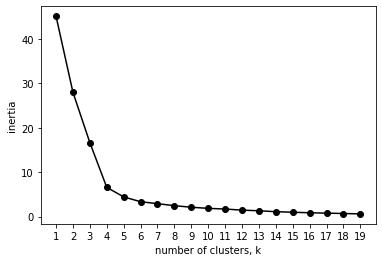

In [273]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(pca_data)

ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()



In [306]:
# Varianza acumulada
pca_data

array([[ 5.90239354e-01,  9.62937004e-02,  1.55787767e-01, ...,
        -5.65533652e-19,  1.56403502e-18, -7.11977879e-19],
       [-5.12941095e-01,  6.77953692e-01,  1.42876752e-01, ...,
        -5.65533652e-19,  1.56403502e-18, -7.11977879e-19],
       [-6.84639556e-01,  4.98368211e-01,  1.71982737e-01, ...,
        -5.65533652e-19,  1.56403502e-18, -7.11977879e-19],
       ...,
       [-1.52066239e-01, -3.04597124e-01, -3.74462756e-01, ...,
        -5.65533652e-19,  1.56403502e-18, -7.11977879e-19],
       [-2.03460360e-01,  5.67637449e-01,  8.41941718e-02, ...,
        -5.65533652e-19,  1.56403502e-18, -7.11977879e-19],
       [-4.47757656e-01,  8.84212213e-01,  1.77956503e-02, ...,
        -5.65533652e-19,  1.56403502e-18, -7.11977879e-19]])

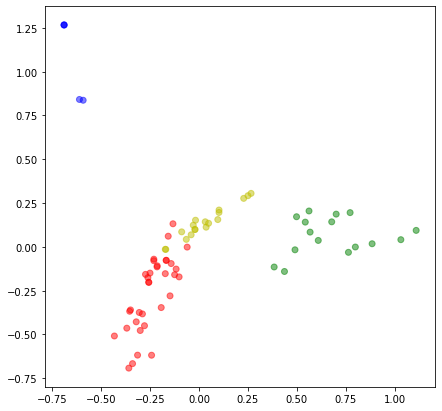

In [285]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 4)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(PCA_components)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(PCA_components.iloc[:,1],PCA_components.iloc[:,2], c= label_color, alpha=0.5) 
plt.show()

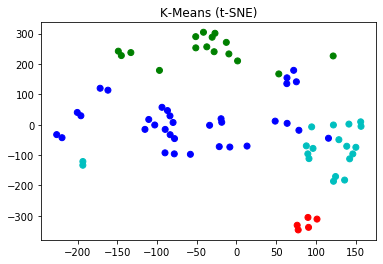

In [281]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2, perplexity = 5).fit_transform( pca_data )

#plot graph
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
plt.scatter(X[:,0], X[:,1], c=colors[kmeans.labels_])
plt.title('K-Means (t-SNE)')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


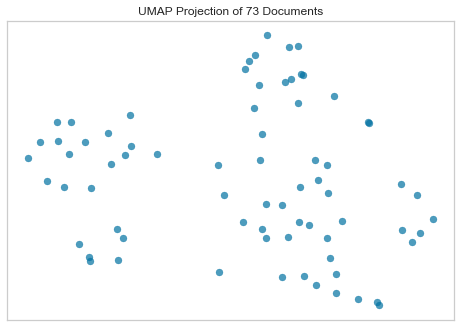

In [302]:
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

from yellowbrick.datasets import load_hobbies
from yellowbrick.text import UMAPVisualizer

# Instantiate the text visualizer
umap = UMAPVisualizer()
umap.fit(a,c = colors[kmeans.labels_])
umap.show()